In [91]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [92]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
nvidia  = yf.download('NVDA', period ="2y", interval="1d")


C:\Users\samkn\AppData\Local\Temp\ipykernel_17812\1128586641.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvidia  = yf.download('NVDA', period ="2y", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [94]:
print(nvidia.head())

Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2023-12-20  48.084213  49.971163  48.071220  49.627352  397894000
2023-12-21  48.962727  49.067668  48.392042  48.783825  300425000
2023-12-22  48.802811  49.355500  48.440010  49.167605  252507000
2023-12-26  49.251556  49.572377  48.932734  48.940729  244200000
2023-12-27  49.389488  49.652342  49.057672  49.483438  233648000


In [95]:
nvidia.dropna(inplace=True)

<Axes: title={'center': 'NVIDIA Closing Prices Over the Last Year'}, xlabel='Date'>

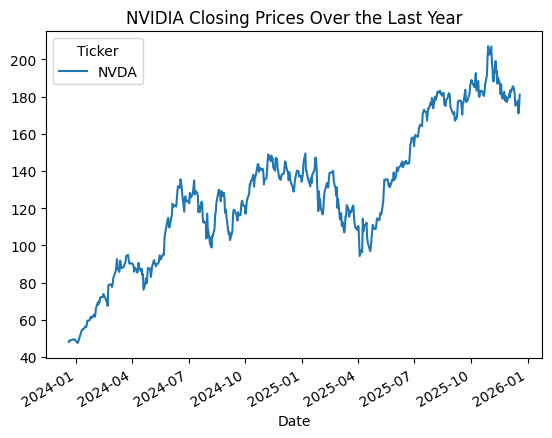

In [96]:
nvidia.plot(y='Close', title='NVIDIA Closing Prices Over the Last Year')

In [97]:
nvidia=np.log(nvidia)

<Axes: title={'center': 'NVIDIA Log Closing Prices Over the Last Year'}, xlabel='Date'>

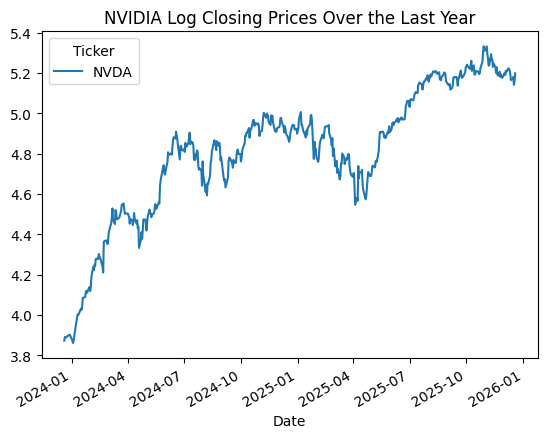

In [98]:
nvidia.plot(y='Close', title='NVIDIA Log Closing Prices Over the Last Year')

In [99]:
%pip install statsmodels

In [100]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

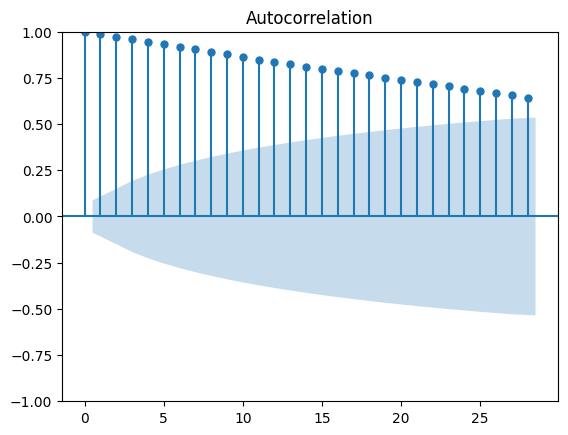

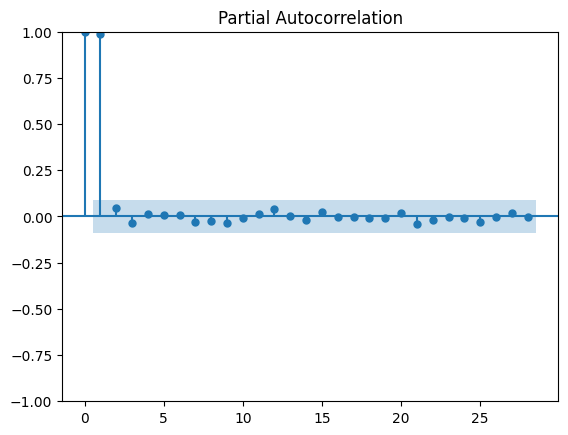

In [101]:
acf = plot_acf(nvidia['Close'])
pacf = plot_pacf(nvidia['Close'])

In [102]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(nvidia['Close'])
print('ADF Statistic:', result[0])

ADF Statistic: -2.7470335201320797


In [103]:
x_train = nvidia['Close'][:int(0.8*len(nvidia))]
x_test = nvidia['Close'][int(0.8*len(nvidia)):]

<Axes: title={'center': 'Differenced Training Data'}, xlabel='Date'>

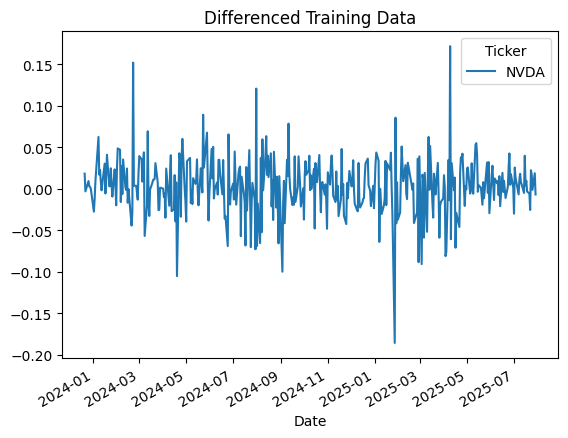

In [104]:
x_train_diff = x_train.diff(1).dropna()
x_test_diff = x_test.diff(1).dropna()
x_train_diff.plot(title='Differenced Training Data')

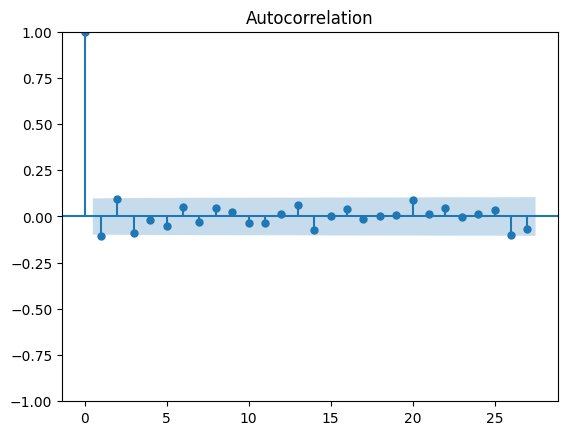

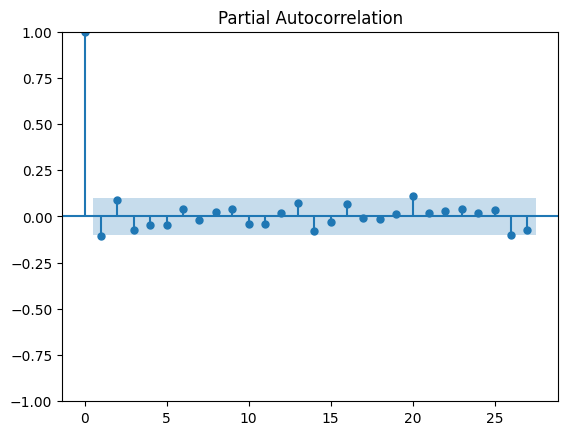

In [105]:
acf_x_train_diff = plot_acf(x_train_diff)
pacf_x_train_diff = plot_pacf(x_train_diff)

In [106]:
adf_x_train_diff = adfuller(x_train_diff)
print('ADF Statistic for Differenced Data:', adf_x_train_diff[0])

ADF Statistic for Differenced Data: -12.026577876716734


In [107]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(x_train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NVDA   No. Observations:                  401
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 784.835
Date:                Mon, 22 Dec 2025   AIC                          -1563.669
Time:                        10:21:07   BIC                          -1551.695
Sample:                             0   HQIC                         -1558.927
                                - 401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7621      0.149     -5.103      0.000      -1.055      -0.469
ma.L1          0.6691      0.168      3.973      0.000       0.339       0.999
sigma2         0.0012   4.67e-05     24.765      0.0

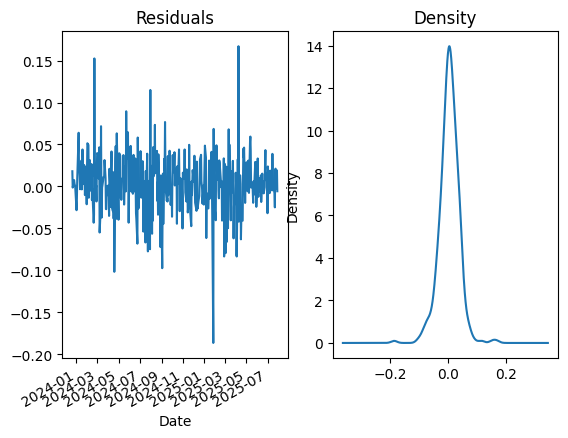

In [108]:
residuals = model_fit.resid[1:]
figure,ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

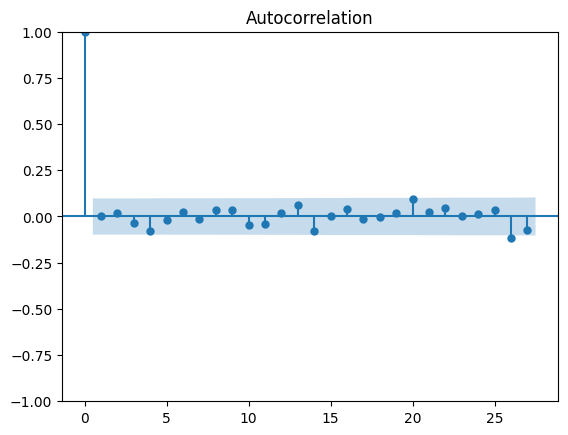

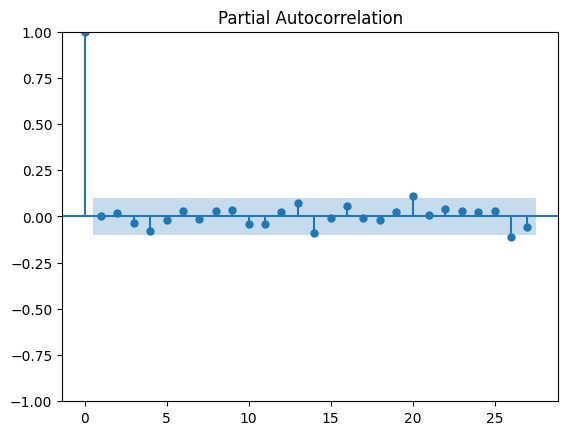

In [109]:
acf_residual = plot_acf(residuals)
pacf_residual = plot_pacf(residuals)

c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

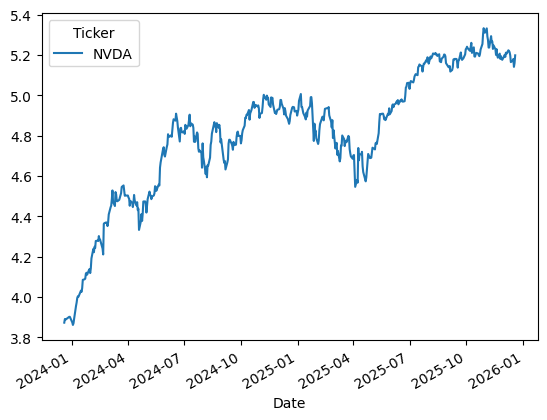

In [110]:
forecast = model_fit.forecast(len(x_test))
nvidia['Forecast']=[None]*len(x_train)+list(forecast)
nvidia['Close'].plot()

<Axes: title={'center': 'NVIDIA Log Closing Prices Over the Last Year'}, xlabel='Date'>

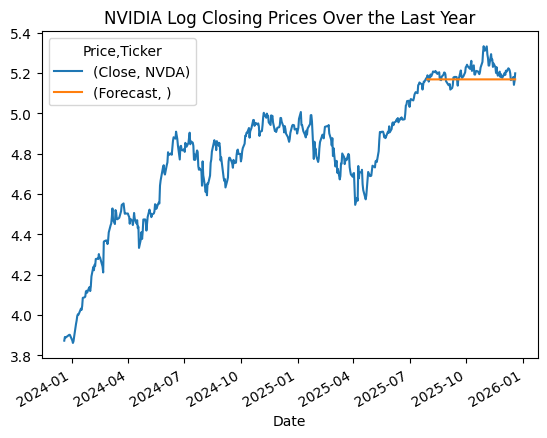

In [111]:
nvidia.plot(y=['Close','Forecast'], title='NVIDIA Log Closing Prices Over the Last Year')

In [112]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [113]:
import pmdarima as pm
auto_model = pm.auto_arima(x_train, stepwise=False, seasonal=False, trace=True)
print(auto_model.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1561.031, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1562.735, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1563.619, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1564.762, Time=0.35 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1563.368, Time=0.62 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-1561.727, Time=0.80 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1563.362, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1565.737, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1563.887, Time=0.60 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1563.452, Time=0.58 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1561.081, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1564.405, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1563.088, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1561.738, Time=0.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1561.446, Time=0.82

In [114]:
######### MODEL EVAL ##########
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
mse = mean_squared_error(x_test, forecast)
mae = mean_absolute_error(x_test, forecast)
rmse = root_mean_squared_error(x_test, forecast)
print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

MSE: 0.0030883938151380842, MAE: 0.04230905988000829, RMSE: 0.055573319274073274


In [115]:
nrmse = rmse/(x_test.mean())
print(f'NRMSE: {nrmse}')

NRMSE: Ticker
NVDA    0.010677
dtype: float64
